**Reto de la semana**

Un clasificador binario es aquel que nos permite etiquetar una observación dada como 0 o 1. La regresión logística es una técnica fundamental en aprendizaje automático que permite construir clasificadores binarios lineales a partir de unos datos de entrenamiento. En este reto, resolviendo el problema de optimización en retos anteriores, analizaremos la búsqueda de la solución del
problema de optimización a la luz de las condiciones de un minimizador.

**Regresión logística** La regresión logística es una técnica que nos permite obtener un clasificador lineal binario. Considere un dato de entrada 𝑥 = [𝑥1, 𝑥2] ∈ ℝ2 , y sea 𝑧 = [𝑥, 1]^𝑇. Sea 𝑤 = [𝑤1, 𝑤2, 𝑤3]^𝑇 el vector de parámetros del clasificador. La clasificación de este dato se realiza a través de la siguiente regla:

Si 𝑤^𝑇𝑧 = 𝑤1𝑥1 + 𝑤2𝑥2 + 𝑤3 > 0, entonces 𝑥 es clasificado como un dato de clase 1

Si 𝑤^𝑇𝑧 = 𝑤1𝑥1 + 𝑤2𝑥2 + 𝑤3 < 0, entonces 𝑥 es clasificado como un dato de clase 0.

La función que mide qué tan bueno es el clasificador con parámetros 𝑤 para clasificar sobre m datos de entrenamiento (denominada función de pérdida) se define a través de la siguiente ecuación:

𝑓(𝑤) = − 1/𝑚 ∑ 𝑡𝑖 log 𝑦𝑖 + (1 − 𝑡𝑖) log(1 - 𝑦𝑖 )
donde:

𝑥(𝑖): i-ésimo dato de entrenamiento. Es un número real en este caso.

𝑧(𝑖) = [𝑥^(𝑖), 1]^𝑇.

𝑡𝑖: es la clase verdadera del i-ésimo dato de entrenamiento. Es 0 o 1.

𝑦𝑖 = 1 / 1+𝑒^−𝑤^𝑇𝑧^(𝑖) es la sigmoide o función logística.

Entre más pequeño el valor de 𝒇(𝒘), mejor es el 𝒘 para definir la regla de clasificación. Es importante aclarar que la notación 𝑥(𝑖) no significa que 𝑥 esté “elevado” a la 𝑖. Es una forma de mostrar que ése es el i-ésimo dato 𝑥.

**Analizando el proceso de optimización**

Considere el archivo adjunto breastCancer. Esta es una base de datos real que contienen información sobre las características extraídas del núcleo de células epiteliales mamarias y otros atributos de células de mama, recolectadas a través del análisis de imágenes digitalizadas de biopsias de mama. Este conjunto de datos presenta 569 observaciones con 2 características
(features) cada una, que corresponden a medidas resultado del análisis de la imagen digital mamaria. Estas características corresponden a 2 propiedades que se calculan para cada núcleo de célula observada en la imagen. La variable pronostic contiene las etiquetas de cada una de estas observaciones, donde 1 es si la muestra tiene malignidad, y 0 si no es una muestra maligna. Esta
base de datos es la que contiene los 𝑥(𝑖) con sus respectivos 𝑡𝑖 para el entrenamiento del clasificador.

**a) Considere el problema de optimización** min(w) 𝑓(𝑤) sujeto a 𝑤 ∈ ℝ3,

donde 𝑓(𝑤) se construye partir de los datos en breastCancer. Usando el código
desarrollado en el reto anterior, solucione este problema de optimización usando algún solver de optimización como minimize de Scipy

In [1]:
# Paso 1: Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Paso 2: Cargar el archivo
df = pd.read_csv('/content/drive/MyDrive/GRNotebooks/MatematicasMachineLearning/Week 5/BreastCancer.csv')

In [ ]:
# Paso 3: Separar los datos por clase
clase_0 = df[df['pronostic'] == 0]
clase_1 = df[df['pronostic'] == 1]

In [ ]:
# Paso 4: Funcion que recibe el vector 𝑤 = [𝑤1, 𝑤2, 𝑤3]^𝑇, y grafica la recta 𝑤1𝑥1 + 𝑤2𝑥2 + 𝑤3 = 0 sobre el scatter plot de los datos
def graficar_recta(w, color='green', etiqueta='Recta de decisión'):
    # Definimos el rango de x1 en función del rango de los datos
    x_vals = np.linspace(df['radius_mean'].min(), df['radius_mean'].max(), 100)

    # Evitamos división por cero
    # Accessing elements of the column vector w
    if w[1, 0] != 0:  # w[1, 0] corresponds to w2
        y_vals = -(w[0, 0] / w[1, 0]) * x_vals - (w[2, 0] / w[1, 0])
    else:
        # Recta vertical si w2 = 0
        x_vals = np.full(100, -w[2, 0] / w[0, 0])
        y_vals = np.linspace(df['smoothness_mean'].min(), df['smoothness_mean'].max(), 100)

    # Dibujamos los puntos y la recta
    plt.figure(figsize=(8, 6))
    plt.ylim(bottom=-3, top=4)
    plt.scatter(clase_0['radius_mean'], clase_0['smoothness_mean'], color='blue', label='Clase 0', alpha=0.7)
    plt.scatter(clase_1['radius_mean'], clase_1['smoothness_mean'], color='red', label='Clase 1', alpha=0.7)
    plt.plot(x_vals, y_vals, color=color, label=etiqueta, linewidth=2)
    plt.xlabel('radius_mean')
    plt.ylabel('smoothness_mean')
    plt.title('Recta de decisión sobre los datos')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
# Paso 5: Funcion de optimizacion utilizando minimize de Scipy

from scipy.optimize import minimize

def f_loss(w):
    m = len(df)
    w_vector = np.array(w).reshape(-1, 1)
    loss = 0
    for i in range(m):
        x = np.array([df['radius_mean'][i], df['smoothness_mean'][i]])
        z = np.concatenate((x, np.array([1])))
        z = z.reshape(-1,1)
        y = 1 / (1 + np.exp(-np.dot(w_vector.T, z)))
        t = df['pronostic'][i]
        loss += - (t * np.log(y) + (1 - t) * np.log(1 - y))
    return loss / m


# Initial guess for w
w0 = np.array([0, 0, 0])

# Optimization using minimize
result = minimize(f_loss, w0)

# Print the optimization results
print(result)



  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.20464127129743323
        x: [ 5.359e+00  1.641e+00  2.443e-01]
      nit: 20
      jac: [ 2.984e-06 -7.028e-06 -8.764e-06]
 hess_inv: [[ 1.743e+02  3.948e+01  2.309e+01]
            [ 3.948e+01  2.670e+01  1.129e+00]
            [ 2.309e+01  1.129e+00  1.799e+01]]
     nfev: 84
     njev: 21


Optimized w: [5.35905533 1.64119605 0.24430322]


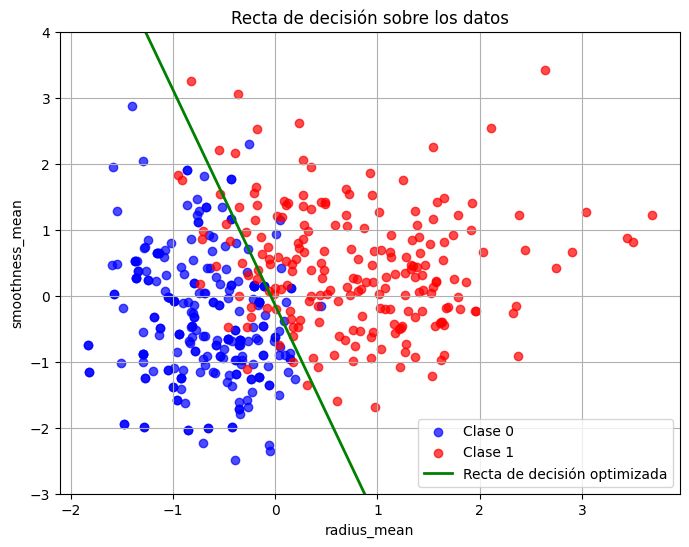

In [ ]:
# Extract optimized w values
optimized_w = result.x
print("Optimized w:", optimized_w)

# Visualize the decision boundary with the optimized w
graficar_recta(optimized_w.reshape(-1, 1), color='green', etiqueta='Recta de decisión optimizada') # Reshape optimized_w to a column vector

**b) Las funciones como minimize de Scipy** realizan un proceso iterativo en el que se evalúan
posibles candidatos 𝑤 en cada iteración, hasta llegar a una solución definitiva. Escriba un código que rastree cada uno de estos candidatos 𝑤 a solución explorados por el solver que resuelve el problema de optimización. En particular, el argumento callback de minimize permite hacer ese rastreo.

In [ ]:
# Paso 1: Codigo de seguimiento de candidatos w

# List to store the candidates w explored by the solver
w_candidates = []

# Callback function to track the candidates
def callback_function(w):
    w_candidates.append(w)

# Optimization using minimize with the callback function
result = minimize(f_loss, w0, callback=callback_function)

# Print the optimization results
print(result)

# Extract optimized w values
optimized_w = result.x
print("Optimized w:", optimized_w)


# Now w_candidates contains all the candidates explored during the optimization process
print("\nCandidates explored during optimization:")
for i, candidate in enumerate(w_candidates):
    print(f"Candidate {i+1}: {candidate}")


NameError: name 'minimize' is not defined

**c) Grafique 𝑓(𝑤) vs. el número de iteraciones**, y observe la evolución de la función objetivo en
cada una de las iteraciones.

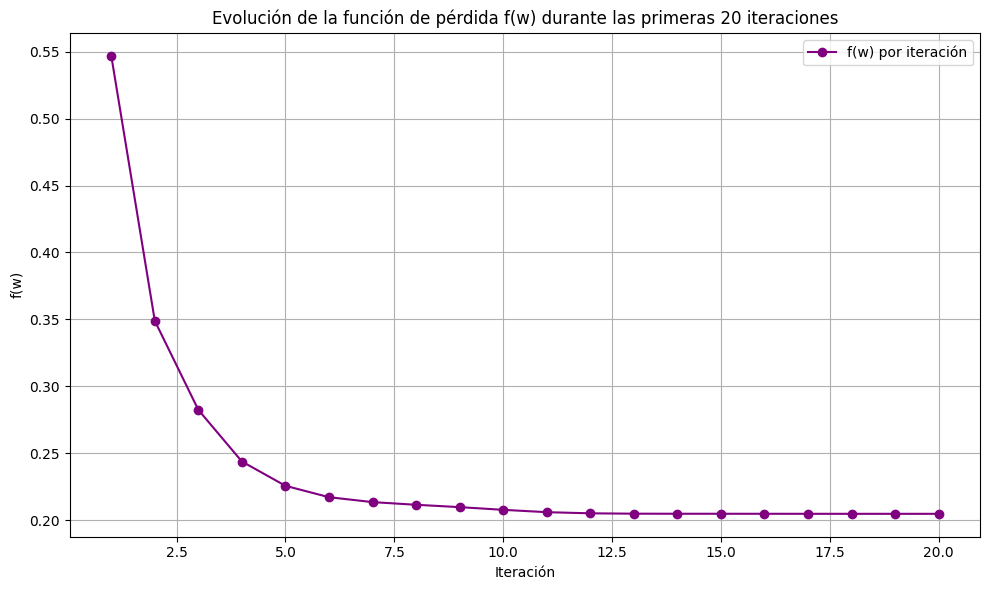

In [ ]:
# Paso 2: Calcular f(w) para cada candidato explorado y aplanar
loss_values = [f_loss(w).item() for w in w_candidates]  # .item() convierte escalar tipo array a float

# Limitar a las primeras 20 iteraciones
loss_values = loss_values[:20]

# Paso 3: Crear vector de iteraciones limitado
iterations = np.arange(1, len(loss_values) + 1)

# Paso 4: Graficar
plt.figure(figsize=(10, 6))
plt.plot(iterations, loss_values, marker='o', linestyle='-', color='purple', label='f(w) por iteración')
plt.xlabel('Iteración')
plt.ylabel('f(w)')
plt.title('Evolución de la función de pérdida f(w) durante las primeras 20 iteraciones')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**d) Grafique ‖∇𝑓(𝑤)‖2 vs. el número de iteraciones**, y observe la evolución del gradiente de la
función objetivo en cada una de las iteraciones.

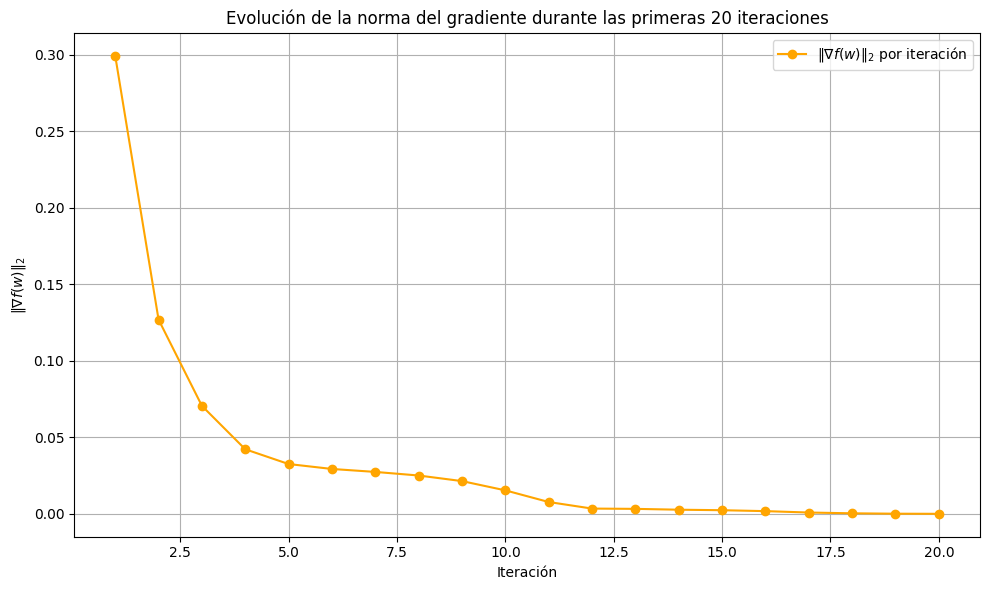

In [ ]:
# Paso 1: Calcular la norma del gradiente para cada candidato
def grad_f(w):
    m = len(df)
    grad = np.zeros_like(w)
    for i in range(m):
        x = np.array([df['radius_mean'][i], df['smoothness_mean'][i], 1])  # Incluye el sesgo
        z = np.dot(w, x)
        y = 1 / (1 + np.exp(-z))
        t = df['pronostic'][i]
        grad += (y - t) * x
    return grad / m  # Promedio sobre las muestras

# Calcular normas del gradiente para cada w explorado (limitado a 20 primeros)
gradient_norms = [np.linalg.norm(grad_f(w)) for w in w_candidates[:20]]

# Paso 2: Crear vector de iteraciones
iterations = np.arange(1, len(gradient_norms) + 1)

# Paso 3: Graficar
plt.figure(figsize=(10, 6))
plt.plot(iterations, gradient_norms, marker='o', linestyle='-', color='orange', label=r'$\|\nabla f(w)\|_2$ por iteración')
plt.xlabel('Iteración')
plt.ylabel(r'$\|\nabla f(w)\|_2$')
plt.title('Evolución de la norma del gradiente durante las primeras 20 iteraciones')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**e) Calcule la Hessiana en el 𝑤 solución al problema de optimización, y evalúe su positividad.**
Use las condiciones de un minimizador para concluir sobre esta solución.

In [ ]:
# Paso 1: Definir la función para calcular la Hessiana en un punto w
def hessian_f(w):
    m = len(df)
    H = np.zeros((3, 3))  # Porque w tiene tamaño 3
    for i in range(m):
        x = np.array([df['radius_mean'][i], df['smoothness_mean'][i], 1])  # Incluye el término de sesgo
        z = np.dot(w, x)
        y = 1 / (1 + np.exp(-z))
        H += y * (1 - y) * np.outer(x, x)
    return H / m

# Paso 2: Calcular la Hessiana en el w optimizado
H_opt = hessian_f(optimized_w)

# Paso 3: Verificar si la Hessiana es positiva definida
eigenvalues = np.linalg.eigvals(H_opt)
is_positive_definite = np.all(eigenvalues > 0)

# Resultados
print("Matriz Hessiana en w*:\n", H_opt)
print("\nValores propios de la Hessiana:\n", eigenvalues)
print("\n¿La Hessiana es positiva definida?:", is_positive_definite)

Matriz Hessiana en w*:
 [[ 0.01005839 -0.01356612 -0.01039176]
 [-0.01356612  0.05477444  0.00994848]
 [-0.01039176  0.00994848  0.06329615]]

Valores propios de la Hessiana:
 [0.00529035 0.07401222 0.04882641]

¿La Hessiana es positiva definida?: True


End of lab